# Линейная регрессия


Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from mpl_toolkits import mplot3d
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/MyDrive/lab4_stats.csv')

Mounted at /content/gdrive


# Линейная регрессия

Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где у - целевая переменная (что мы хотим предсказать), $x_i$ -- признак объекта х, $w_i$ -- вес i-го признака, b -- bias (смещение, свободный член)

Часто предполагают, что объект х содержит в себе фиктивный признак, который всегда равен 1, тогда bias это есть вес этого признака. В этом случае формула принимает простой вид:
$$ y = <w, x>. $$

В матричной форме, в случае, когда у нас есть n объектов формулу можно переписать следующим образом:
$$ Y = Xw,$$
Y -- вектор размера n, X -- матрица объекты-признаки размера $n \times k$, w -- вектор весов размера k.

Решение по методу наименьших квадратов дает
$$ w = (X^TX)^{-1}X^TY $$

Сгенерируем искусственные данные.

In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, y, X_train, y_train, X_test, y_test

In [ ]:
X, y, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


Визуализируйте данные (можно использовать библиотеку matplotlib).

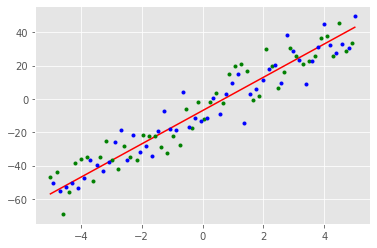

In [ ]:
plt.plot(X, y,'r', X_train, y_train, 'g.', X_test, y_test, 'b.')
plt.show()

Поработайте с простейшим одномерным случаем регрессии. Обучите модель на тренировочной выборке и проверьте значения на тестовой выброке.
Полученные ответы ()предсказания сохраните в переменную, а так же и полученные коэффициенты (веса) модели.

In [ ]:
def fit(X, y):
    n, k = X.shape
    X = np.hstack((X, np.ones((n, 1))))
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

In [ ]:
def predict(X, w):
    n, k = X.shape
    X = np.hstack((X, np.ones((n, 1))))
    y_pred = X @ w
    return y_pred

In [ ]:
weights = fit(X_train, y_train)
prediction = predict(X_test, weights)
weights

array([ 9.6211792 , -6.48134145])

Визуализируйте предсказания.

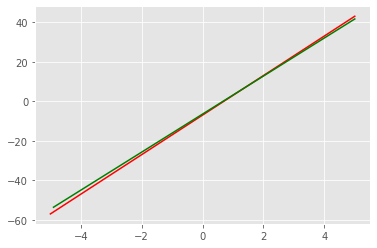

In [ ]:
plt.plot(X, y, 'r', X_test, prediction, 'g')
plt.show()

## Оценка результатов

Вычислите среднеквадратичную ошибку на трейне и на тесте, также вычислите среднюю абсолютную ошибку (MSE, MAE).

In [ ]:
def mse(y1, y2):
  return ((y1-y2)**2).mean()

mse_train = mse(y_train, predict(X_train, weights))
print('mse train =', mse_train)
mse_test = mse(y_test, prediction)
print('mse test =', mse_test)

mse train = 75.9590171857364
mse test = 63.233284816761206


In [ ]:
def mae(y1, y2):
  return (abs(y1-y2)).mean()

mae_train = mae(y_train, predict(X_train, weights))
print('mae train =', mae_train)
mae_test = mae(y_test, prediction)
print('mae test =', mae_test)


mae train = 7.6518105711214
mae test = 6.4159739756722844


# Реальный датасет

Поработайте с реальным датасетом: возьмите данные о значениях одного из макроэкономических показателей (в качестве объясняемой переменной) и выберете другие в качестве объясняющих переменных.  
Данные можно найте, например, тут http://sophist.hse.ru/hse/nindexn.htm
или тут https://rosstat.gov.ru/folder/10705

Сформируйте из данных датасет, загрузите его и выведите информацию

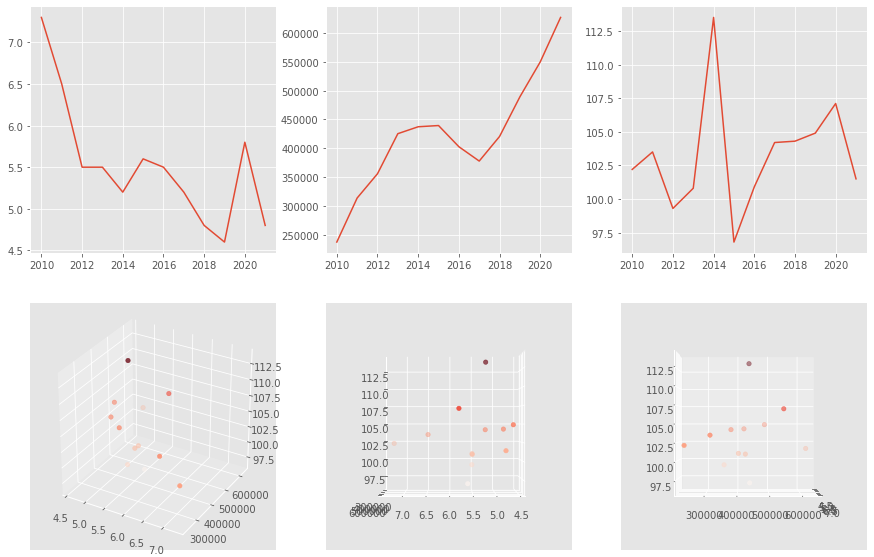

In [ ]:
from matplotlib.figure import projections
years = np.arange(2010,2022)
X1 = data.iloc[:,0].values
X1_norm = (X1-np.mean(X1))/np.sqrt(np.var(X1))
X2 = data.iloc[:,2].values
X2_norm = X2/np.linalg.norm(X2)
Y_r = data.iloc[:,1].values
Y_r_norm = Y_r/np.linalg.norm(Y_r)
fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot(2,3,4,projection='3d')
ax.scatter3D(X1, X2, Y_r, c=Y_r, cmap='Reds' )
ax = fig.add_subplot(2,3,5,projection='3d')
ax.scatter3D(X1, X2, Y_r, c=Y_r, cmap='Reds' )
ax.view_init(0,90)
ax = fig.add_subplot(2,3,6,projection='3d')
ax.scatter3D(X1, X2, Y_r, c=Y_r, cmap='Reds')
ax.view_init(0,0)
ax = fig.add_subplot(2,3,1)
ax.plot(years, X1)
ax = fig.add_subplot(2,3,2)
ax.plot(years, X2)
ax = fig.add_subplot(2,3,3)
ax.plot(years, Y_r)
fig.show()




Визуализируйте распределения признаков в датасете

Посмотрите, как скоррелированы данные

In [ ]:
corr_matrix = data.corr()
corr_matrix

,unemp_rate,fund_ind,science_funds
unemp_rate,1.000000,-0.155439,-0.696257
fund_ind,-0.155439,1.000000,0.148543
science_funds,-0.696257,0.148543,1.000000


На основе этого определите какие факторы окажутся наиболее значимыми и в какую сторону?

## Обучение на реальных данных

Разобьём выборку на train и test в соотношении 70/30.

In [ ]:
num = np.arange(12)
np.random.seed(12)
np.random.shuffle(num)
X1_train = np.zeros((1,8))
X2_train = np.zeros((1,8))
Y_r_train = np.zeros((1,8))
X1_test = np.zeros((1,4))
X2_test = np.zeros((1,4))
Y_r_test = np.zeros((1,4))
for i in range(8):
  X1_train[0,i] = X1[num[i]]
  X2_train[0,i]= X2[num[i]]
  Y_r_train[0,i] = Y_r[num[i]]
for i in range(8,12):
  X1_test[0,i-8] = X1[num[i]]
  X2_test[0,i-8] = X2[num[i]]
  Y_r_test[0,i-8] = Y_r[num[i]]


Сделайте нормировку данных

In [ ]:
def norm(X):
  return (X-np.mean(X))/np.sqrt(np.var(X))

X1_train_norm = norm(X1_train)
X2_train_norm = norm(X2_train)
Y_r_train_norm = norm(Y_r_train)
X1_test_norm = norm(X1_test)
X2_test_norm = norm(X2_test)
Y_r_test_norm = norm(Y_r_test)




Постройте линейную регрессию и подсчитайте её качество на тесте.

In [ ]:
X_r_train = np.concatenate((X1_train_norm.T, X2_train_norm.T), axis=1)
X_r_test = np.concatenate((X1_test_norm.T, X2_test_norm.T), axis=1)
print(X_r_test)

[[-0.12382325 -0.57063892]
 [ 1.52715344 -0.91888056]
 [-0.12382325 -0.18278961]
 [-1.27950693  1.67230909]]


In [ ]:
weights2 = fit(X_r_train, Y_r_train_norm.T)
pred_r = predict(X_r_test, weights2)
print('mse =', mse(Y_r_test_norm, pred_r))
print('mae =', mae(Y_r_test_norm, pred_r))


mse = 1.0860271436360671
mae = 0.8504846553507782


Визуализируем получившиеся результаты

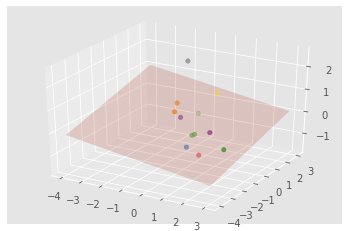

In [ ]:
fig2 = plt.figure()
ax = fig2.add_subplot(projection='3d')
xx, yy = np.meshgrid(range(-4,4), range(-4,4))
zz = (xx * weights2[0,0]+yy * weights2[1,0]+np.ones((8,8))*weights2[2,0])
ax.plot_surface(xx, yy, zz, alpha=0.2)
ax.scatter(norm(X1),norm(X2), norm(Y_r), c=norm(Y_r), cmap='Set1')
plt.show()





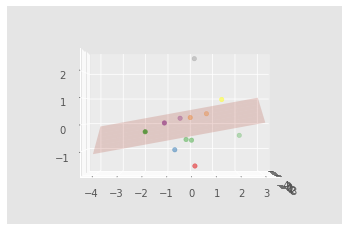

In [ ]:
ax.view_init(0,0)
fig2